## Matplotlib
This is the dedicated library to plot and visually show data. We import it using the following instruction.

In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np # Just to use arrays to plot

By default, `matplotlib` should plot the graph and embed it in Jupyter. If it does not, you can use the magic function 

In [ ]:
%matplotlib inline 

In [ ]:
a=np.linspace(0,2*np.pi,100) 
b=np.sin(a)
plt.plot(a,b) # Key plotting method

If you want to plot outside Jupyter, you can use the magic function
```python
%matplotlib #wx, gtk, osx, tk, empty uses default
```

Providing arguments (args) and keyword arguments (kwargs) can change the way we graph.

In [ ]:
help(plt.plot)

In [ ]:
a = np.linspace(0, 2*np.pi, 10)
b = np.sin(a)
plt.plot([0,1],[0,1])
plt.plot(a,b,color="green", linestyle="--", marker="*",  alpha=0.5, 
        linewidth = 1, markerfacecolor="b", markersize=10)

And multiple graphs can share the same canvas:

In [ ]:
fig, axes=plt.subplots(2,2,figsize=(6,7),sharey=True, sharex=True)
axes[0,0].plot(a,np.sin(a))
axes[0,1].plot(a,np.sin(2*a))
axes[1,0].plot(a,np.sin(3*a))
axes[1,1].plot(a,np.sin(4*a))
fig.subplots_adjust(wspace=0)

To further personalize the disposition in which the graphs will share a canvas, we use `Gridspec`

In [ ]:
from matplotlib.gridspec import GridSpec

In [ ]:
gs = GridSpec(3,3)

plt.subplot(gs[0,:]) #Note el cáracter matricial de gs
plt.plot(a, np.e**a)

plt.subplot(gs[1,0])
plt.plot(-a, np.e**a)

plt.subplot(gs[1,1])
plt.plot(a, -np.e**a)

plt.subplot(gs[2,:2])
plt.plot(-a, -np.e**a)

plt.subplot(gs[1:,2])
plt.plot(a, np.e**a)


## Histograms
With `matplotlib` we can also draw histograms easily.

In [ ]:
gaussian_numbers = np.random.randn(10000) 
bins = np.linspace(-10, 10, 100)
plt.hist(gaussian_numbers, bins = bins)
plt.text(5,700,r"$\int e^{-x}dx$")
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

## Exercises

- Plot the exponential function.
- Plot the $\pi(x)$ function (number of primes smaller or equal to $x$).
- Find and plot the polynomial of $n$-th order passing through $(n+1)$ randomly generated data.
- Simulate $N$ (large) agents starting at zero, such that in each period each agent randomly decides to move to the right (or left) with a probability of 50%. Draw an histogram of the final positions for $T$ (large) iterations of the agents and try to draw the underlying distribution.

In [ ]:
x = np.linspace(-10, 10, 200)
plt.plot(x, np.exp(x))

In [ ]:
from tqdm import tqdm

In [ ]:
from numba import njit

In [ ]:
@njit
def primes(x):
    p = [2]
    for ii in range(3, x + 1):
        isPrime = True
        for prime in p:
            if ii % prime == 0:
                isPrime = False
                break
        if isPrime:
            p.append(ii)
    return p

In [ ]:
def primes_native(x):
    p = [2]
    for ii in range(3, x + 1):
        isPrime = True
        for prime in p:
            if ii % prime == 0:
                isPrime = False
                break
        if isPrime:
            p.append(ii)
    return p

In [ ]:
p = primes(int(1e6))

In [ ]:
subP = p

In [ ]:
plt.plot(subP, np.arange(1, len(subP) + 1), marker="o", label=r"$\pi(x)$")
x = np.linspace(2, subP[-1], 100)
plt.plot(x, x/np.log(x), label=r"$\frac{x}{\log x}$")
plt.legend()

In [ ]:
X = [7, 11, 25, 36, 40, 68]
Y = [1, -1, 3, 0 , 2, 6]

In [ ]:
def L(x, j):
    product = 1
    for ii in range(len(X)):
        if ii == j:
            continue
        product *= (x-X[ii])/(X[j]-X[ii])
    return product
def f(x):
    suma = 0
    for ii in range(len(X)):
        suma += Y[ii] * L(x, ii)
    return suma

In [ ]:
plt.scatter(X,Y)
r = np.linspace(-1, 68, 1000)
plt.plot(r,  f(r))

In [ ]:
N = int(1e6)
T = 30
h = 2*np.random.randint(0,2, (N, T)) - 1
h = np.sum(h, axis=1)
sigma = np.var(h)

In [ ]:
plt.hist(h, bins = 30, density=True)
x = np.linspace(-T, T, 100)
plt.plot(x, 1/(2*np.pi*sigma)**.5 * np.exp(-x**2/(2*sigma)))

## Box Plots, Violin Plots and Pie Charts

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Set a seed for reproducibility
np.random.seed(42)

# Generate sample data
data1 = np.random.uniform(80, 90, 200)
data2 = np.random.normal(80, 20, 200)
data3 = np.random.normal(90, 15, 200)

# Create a figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# 1. Box Plot
box_data = [data1, data2, data3]
ax1.boxplot(box_data, labels=['Data 1', 'Data 2', 'Data 3'])
ax1.set_title('Box Plot')
ax1.set_ylabel('Value')

# 2. Violin Plot
violin_data = [data1, data2, data3]
ax2.violinplot(violin_data, showmeans=True, showmedians=True)
ax2.set_title('Violin Plot')
ax2.set_xticks([1, 2, 3])
ax2.set_xticklabels(['Data 1', 'Data 2', 'Data 3'])
ax2.set_ylabel('Value')

# 3. Pie Chart
pie_data = [3, 2, 1]
pie_labels = ['Data 1', 'Data 2', 'Data 3']
ax3.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90)
ax3.set_title('Pie Chart')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
for i, data in enumerate([data1, data2, data3], 1):
    print(f"Data {i} - Mean: {np.mean(data):.2f}, Median: {np.median(data):.2f}, Std Dev: {np.std(data):.2f}")

## Styles

In [ ]:
print(plt.style.available)

In [ ]:
plt.style.use("seaborn-v0_8-pastel")

In [ ]:
x = np.linspace(0,1)
plt.plot(x, x, label = "$y=x$")
plt.plot(x, 2*x, label = "$y=2x$")
plt.xlabel("$x$-axis")
plt.ylabel("$y$-axis")
plt.legend()

### Temporary styling

In [ ]:
with plt.style.context(('bmh')):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), "--")
    plt.plot(np.sin(2*np.linspace(0, 2 * np.pi)))

## Colormaps
This is a common visualization technique for 2D scalar fields. For example, we can graph $f(x,y)=x^2+y^2$ in $[0,1]\times[0,1].$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
a = np.linspace(0,1, 100)

In [13]:
A,B = np.meshgrid(a,a)

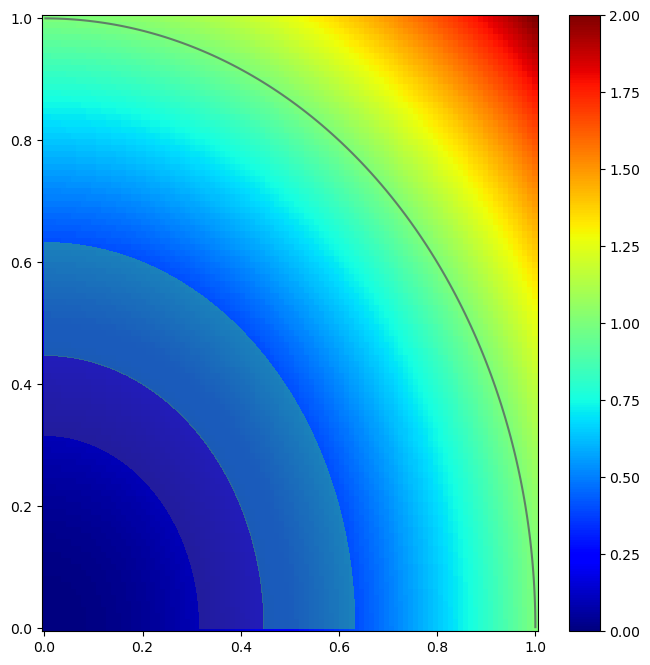

In [14]:
f=plt.figure(figsize=(8,8))
plt.pcolor(A,B,A**2+B**2, cmap="jet")
plt.colorbar() 
plt.contour(A, B, A**2+B**2, [1], alpha=0.5)
test = plt.contourf(A, B, A**2+B**2, [.1,.2,.4], alpha=0.5)

In [ ]:
test

Reference on colormaps: https://matplotlib.org/examples/color/colormaps_reference.html

In [ ]:
path = test.allsegs # List of all contours from test
path[0][0]
np.sum(path[0][0] ** 2, axis = 1)[(np.sum(path[0][0] ** 2, axis = 1) < 0.1)]

$f(x,y) = x^2 - y^2$, $[-1,1]\times [-2,2]$. Hyperbolic parabolloid

In [ ]:
x, y = np.linspace(-1, 1, 100), np.linspace(-2, 2, 100) # Initial vectors

In [ ]:
X, Y = np.meshgrid(x,y) # Creamos las matrices que relacionan ambos vectores

In [ ]:
plt.pcolor(X, Y, X**2 - Y**2, cmap="magma") # Mapa de colores
plt.colorbar() # Barra de la derecha (barra de colores)
f = plt.contour(X, Y, X ** 2 - Y ** 2, [0]) # Curvas de nivel (cuándo el campo es exactamente 0)

In [ ]:
data = f.allsegs # all segments (todos los segmentos)

In [ ]:
plt.pcolor(X, Y, X**2 - Y**2, cmap="magma") # Mapa de colores
plt.colorbar() # Barra de la derecha (barra de colores)
f = plt.contourf(X, Y, X ** 2 - Y ** 2, [-1, 0]) # Superficies de nivel (cuándo el campo es exactamente 0)

In [ ]:
data = f.allsegs # Retrieve the points for which -1<x^2-y^2<0

In [ ]:
data[0]

## 3D
### Curves

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #Library to plot in 3D
import numpy as np 

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # 111 = proportion of the axis

t=np.linspace(-2*np.pi,2*np.pi,100)
plt.plot(1+np.cos(t),np.sin(t),2*np.sin(t/2), "r--", label="Viviani's curve") # Parametric curve
plt.legend()
plt.show()

### Surfaces

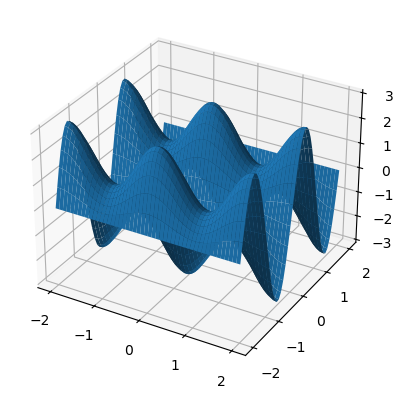

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x=np.linspace(-2,2)
y=np.linspace(-2,2)
X,Y=np.meshgrid(x,y) # Reticula
ax.plot_surface(X,Y,(2+np.cos(np.pi*X))*np.sin(np.pi*Y)) # Graficar superficie
plt.show()

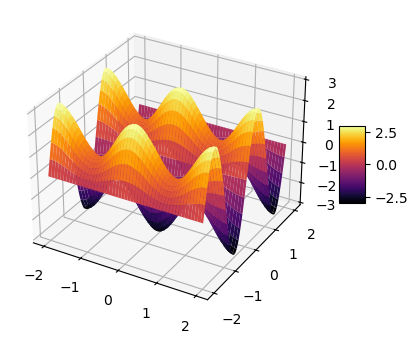

In [59]:
from matplotlib import cm
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
x=np.linspace(-2,2,200)
y=np.linspace(-2,2,200)
X,Y=np.meshgrid(x,y) 

surf = ax.plot_surface(X,Y,(2+np.cos(np.pi*X))*np.sin(np.pi*Y), cmap=cm.inferno) # Graph surface with a colormap
fig.colorbar(surf, shrink=0.2, aspect=3) # Barra de colores
plt.show()

## Error graphs

In [64]:
x = np.linspace(0,10, 20) # x has a measurement error 
error_x = np.random.uniform(0,1, 20) # This is the error
error_x

array([0.40606651, 0.13521535, 0.30687397, 0.65040153, 0.17541362,
       0.10680014, 0.53918886, 0.89895837, 0.2509011 , 0.09263992,
       0.76166309, 0.59802677, 0.82889529, 0.59023007, 0.12810444,
       0.78673168, 0.05004798, 0.46350751, 0.40667168, 0.55800424])

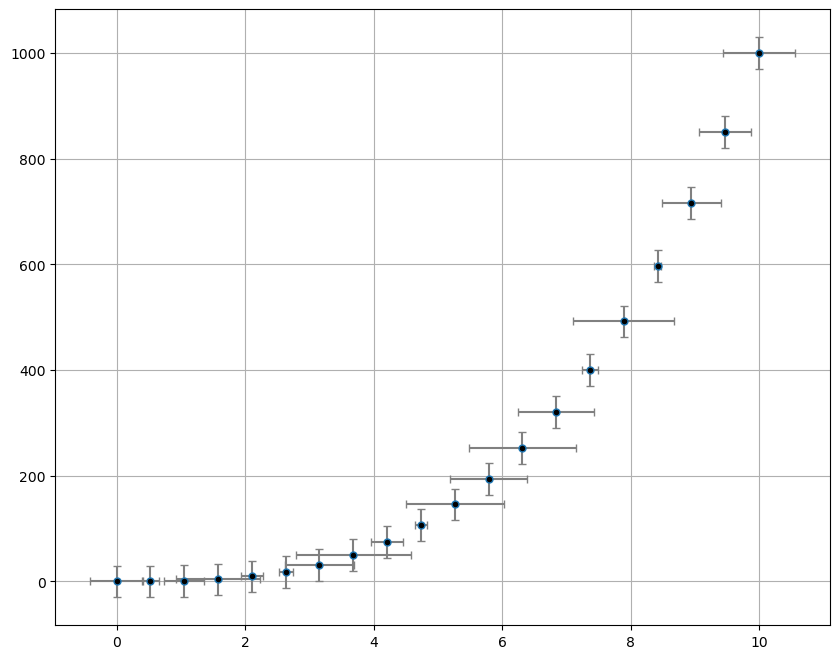

In [65]:
f=plt.figure(figsize=(10,8))
plt.errorbar(x, x**3, yerr=30, xerr=error_x,  linestyle="none", marker="o", markerfacecolor="k", 
         markersize=5, ecolor="grey", capsize=3)
plt.grid() 

## Projections

In [87]:
np.ones(70) * np.pi/4

array([0.78539816, 0.78539816, 0.78539816, 0.78539816, 0.78539816,
       0.78539816, 0.78539816, 0.78539816, 0.78539816, 0.78539816,
       0.78539816, 0.78539816, 0.78539816, 0.78539816, 0.78539816,
       0.78539816, 0.78539816, 0.78539816, 0.78539816, 0.78539816,
       0.78539816, 0.78539816, 0.78539816, 0.78539816, 0.78539816,
       0.78539816, 0.78539816, 0.78539816, 0.78539816, 0.78539816,
       0.78539816, 0.78539816, 0.78539816, 0.78539816, 0.78539816,
       0.78539816, 0.78539816, 0.78539816, 0.78539816, 0.78539816,
       0.78539816, 0.78539816, 0.78539816, 0.78539816, 0.78539816,
       0.78539816, 0.78539816, 0.78539816, 0.78539816, 0.78539816,
       0.78539816, 0.78539816, 0.78539816, 0.78539816, 0.78539816,
       0.78539816, 0.78539816, 0.78539816, 0.78539816, 0.78539816,
       0.78539816, 0.78539816, 0.78539816, 0.78539816, 0.78539816,
       0.78539816, 0.78539816, 0.78539816, 0.78539816, 0.78539816])

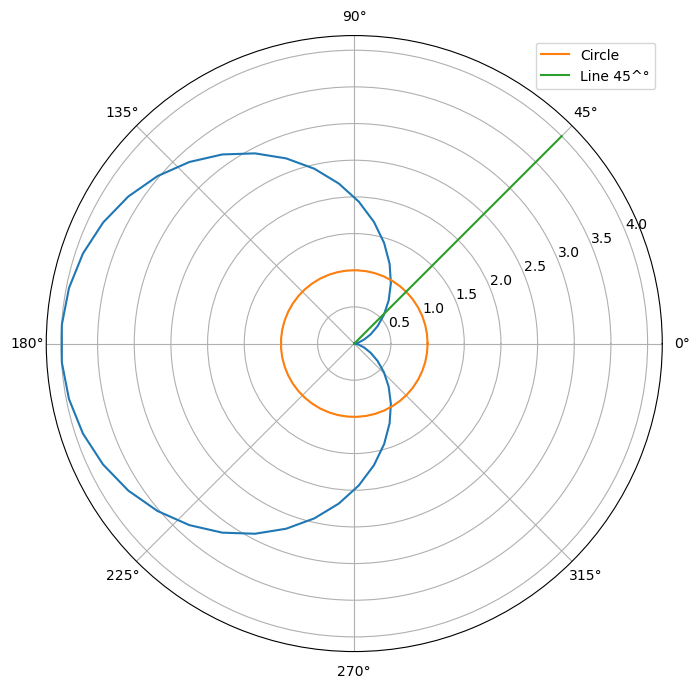

In [90]:
f=plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='polar') # coordenadas polares (angulo, radio)

theta=np.linspace(0, 2*np.pi)
r=2*(1-np.cos(theta))

ax.plot(theta, r)
ax.plot(theta, np.ones(50), label="Circle") # Circulo de radio 1
ax.plot(np.pi/4 * np.ones(50), np.linspace(0, 4), label="Line 45^°") # Linea de 45 grados de inclinacion
ax.grid(True)
plt.legend()

In [92]:
from matplotlib.gridspec import GridSpec

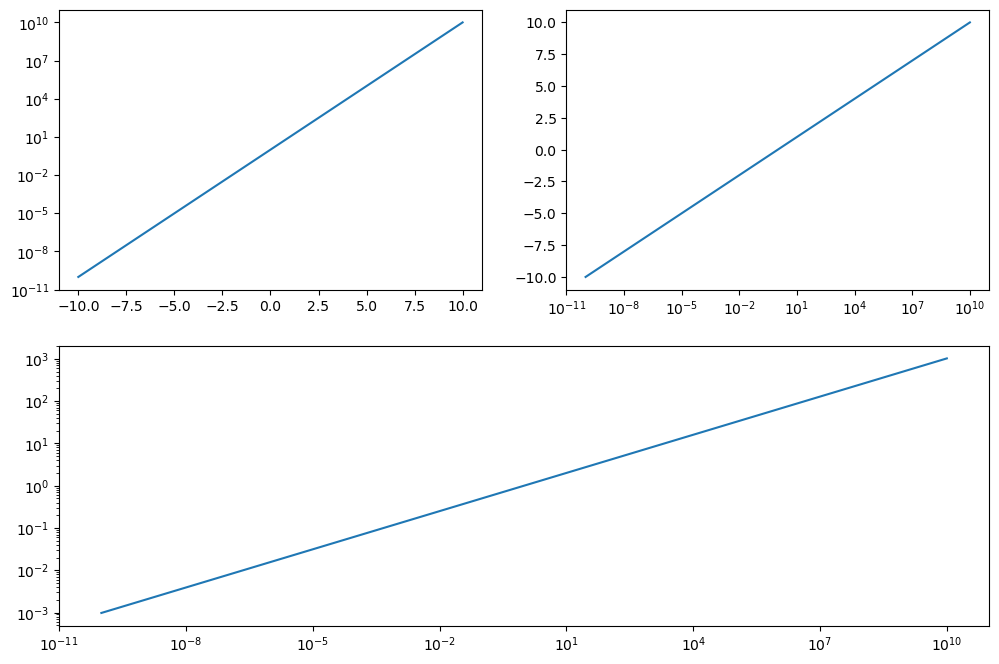

In [93]:
a=np.linspace(-10,10)
b=10**a
c = 2 **a
f=plt.figure(figsize=(12,8))
gs = GridSpec(2,2)

plt.subplot(gs[0,0])
plt.semilogy(a,b)

plt.subplot(gs[0,1])
plt.semilogx(b, a)

plt.subplot(gs[1,:])
plt.loglog(b, c)

## Image Analysis

In [7]:
import matplotlib.image as mpimg

In [63]:
img = mpimg.imread('pleyadesM45.jpg') #Read the image

In [9]:
img.shape

(195, 259, 3)

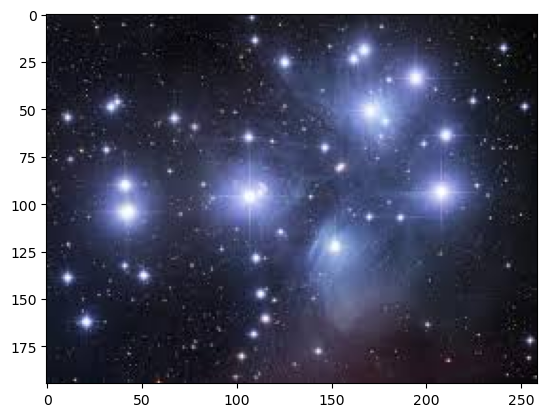

In [10]:
plt.imshow(img)
plt.grid(False)

[[45 39 25 ... 10 10 10]
 [56 34 24 ... 10 10 10]
 [41 23 10 ...  9  9  9]
 ...
 [18 24  8 ... 23 44 74]
 [15 23  6 ...  6  8  7]
 [15 20  7 ... 10 12 12]]
(195, 259)


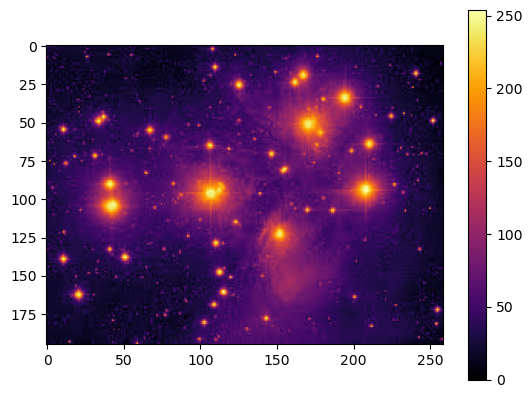

In [107]:
lum_img = img[:,:,0] # Red
print(lum_img)
print(lum_img.shape)
plt.imshow(lum_img, cmap="inferno")
plt.colorbar() # Colorbar for the colormap

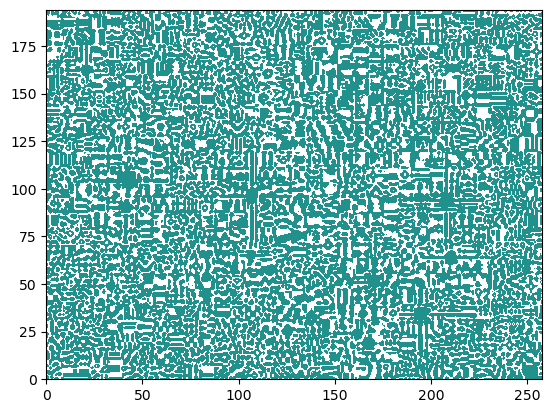

In [57]:
lum_img = convolved
h = np.linspace(0, 255, 200, endpoint=False)
l = []
for ii in h:
    f = plt.contourf(lum_img, [ii,255])
    l.append(len(f.allsegs[0]))
#plt.imshow(lum_img)

Text(0, 0.5, 'Stars Count')

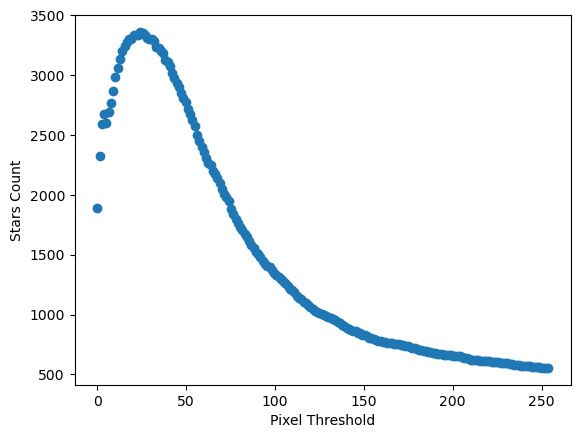

In [58]:
plt.scatter(h, l)
plt.xlabel("Pixel Threshold")
plt.ylabel("Stars Count")

24.224999999999998


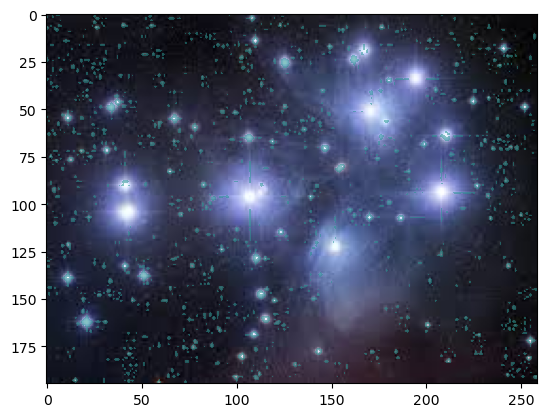

In [67]:
print(h[l.index(max(l))])
plt.imshow(img)
plt.contourf(lum_img, [100, 255], alpha=0.5)

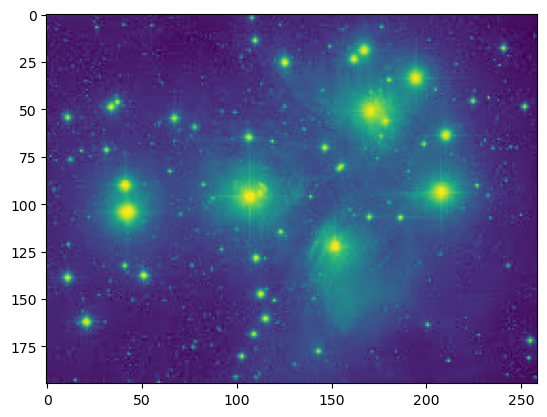

In [104]:
lum_img = img[:,:,1] # Green
plt.imshow(lum_img)

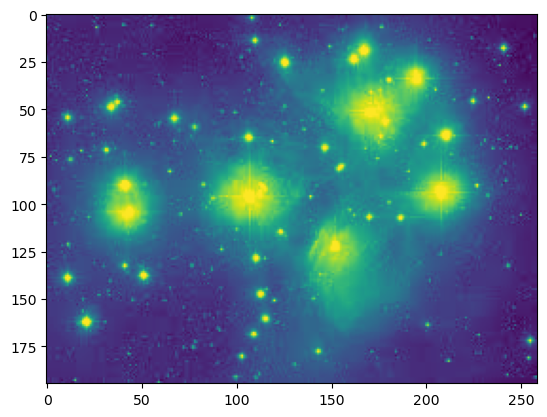

In [105]:
lum_img = img[:,:,2] # Blue
plt.imshow(lum_img)

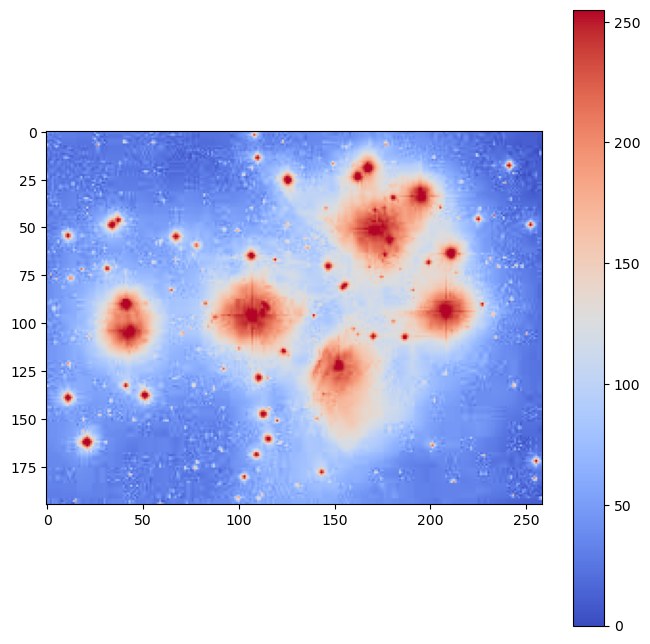

In [106]:
lum_img = img[:,:,2]
f=plt.figure(figsize=(8,8))
result=plt.imshow(lum_img)
result.set_cmap('coolwarm')
plt.grid(False)
plt.colorbar()
# Veritasium Led Azul

In [ ]:
lum_img = np.mean(img, axis=2)
a =plt.hist(lum_img.reshape(50505,), bins=50)
plt.vlines(np.mean(lum_img), ymin=0, ymax =3500, color="r")
plt.vlines(np.mean(lum_img) + 2*np.std(lum_img), ymin=0, ymax =3500, color="r")

In [ ]:
result = plt.imshow(lum_img)
result.set_cmap('coolwarm')
test = plt.contourf(lum_img, [180, np.max(lum_img)], alpha=1)

In [ ]:
len(test.allsegs[0])

### Exercise
- Try to hide all "bright" stars from the previous image.
- Do you have any idea about how to count the number of stars in this image?

## Image interpolation

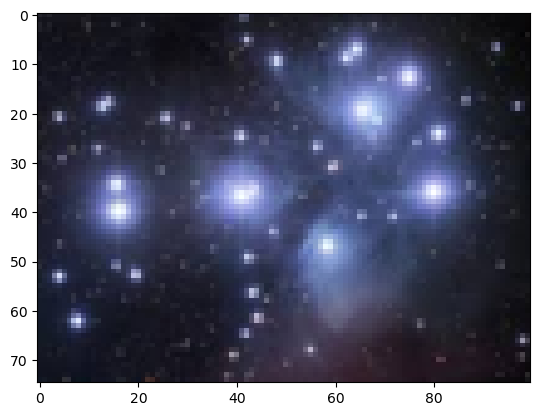

In [125]:
from PIL import Image
img = Image.open('pleyadesM45.jpg')
img.thumbnail((100, 100)) 

imgplot = plt.imshow(img)

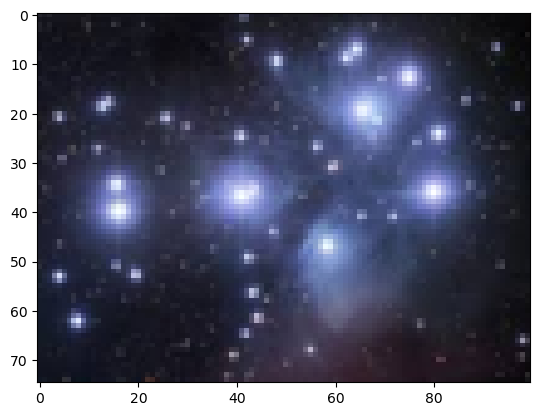

In [126]:
imgplot = plt.imshow(img, interpolation="nearest")

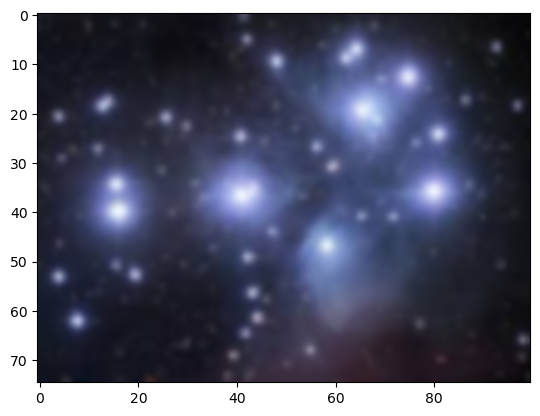

In [127]:
imgplot = plt.imshow(img, interpolation="bicubic")

### Introduction to convolution

In [128]:
import numpy as np

In [129]:
a = np.array([1/6]*6)
a

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

$X, Y\sim Unif(1,6)$: $\mathbb{P}[X + Y =2] =1/36$, $\mathbb{P}[X + Y =3] =2/36=1/18$, $\mathbb{P}[X + Y =4] =3/36=1/12$

$$(a * v)_n = \sum_{m = -\infty}^{\infty} a_m v_{n - m}$$

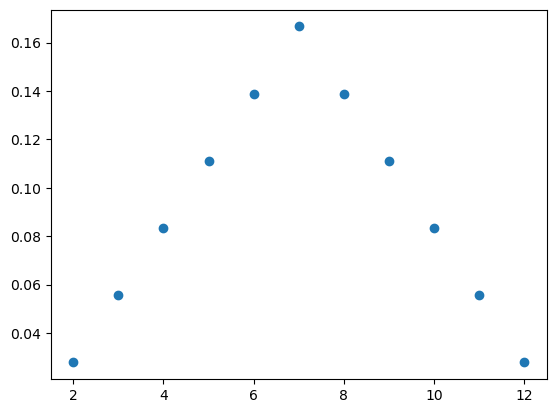

In [135]:
plt.scatter(np.arange(2,13),np.convolve(a,a)) # probability of sum of two dice of 6 faces

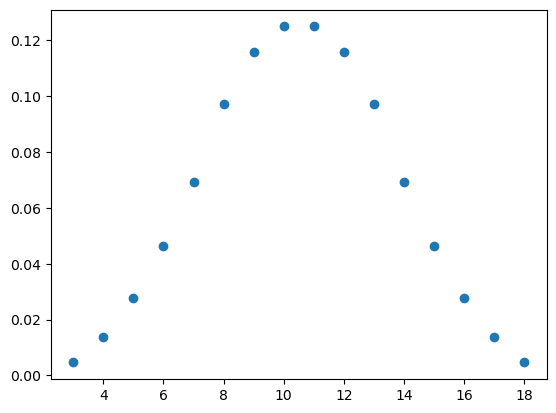

In [139]:
b = np.convolve(np.convolve(a,a),a)
plt.scatter(np.arange(3,19), b)

In [148]:
b.shape, np.arange(4, 6*n)

((21,),
 array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
        21, 22, 23]))

np.int64(52)

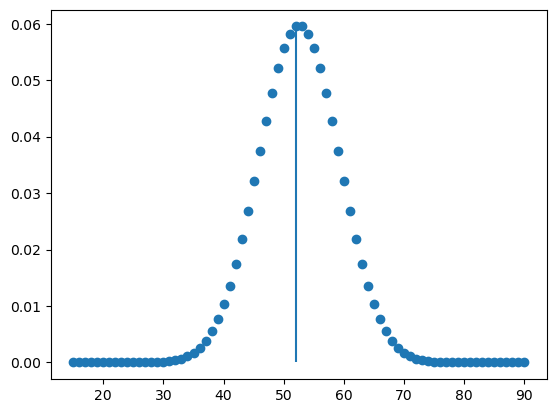

In [156]:
# n dice of 6 faces P(X+Y=k)?
n = 15
a = np.array([1/6]*6)
b = np.array([1/6]*6)
for ii in range(n - 1):
    b = np.convolve(a,b)
plt.scatter(np.arange(n, 6*n + 1), b)
plt.vlines(n + np.argmax(b), 0, np.max(b))
n + np.argmax(b)

In [ ]:
b = np.array([1/3]*3)
b

In [ ]:
np.convolve(a,b)

## Image Convolution

In [43]:
#Define some example kernels
kernels = {
    "Identity": np.array([[0, 0, 0],
                          [0, 1, 0],
                          [0, 0, 0]]),
    "Edge Detection": np.array([[-1, -1, -1],
                                [-1,  8, -1],
                                [-1, -1, -1]]),
    "Sharpen": np.array([[0, -1,  0],
                         [-1, 5, -1],
                         [0, -1,  0]]),
    "Box Blur": np.array([[1/9, 1/9, 1/9],
                          [1/9, 1/9, 1/9],
                          [1/9, 1/9, 1/9]]),
    "Gaussian Blur": np.array([[1/16, 2/16, 1/16],
                               [2/16, 4/16, 2/16],
                               [1/16, 2/16, 1/16]])
}

In [44]:
from scipy.signal import convolve2d # Method for doing convolutions

In [45]:
import matplotlib.pyplot as plt

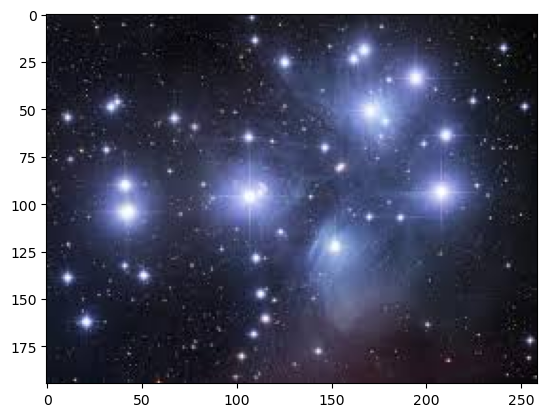

In [46]:
img=mpimg.imread('pleyadesM45.jpg') #Read the image
plt.imshow(img)

In [47]:
convolved = convolve2d(img, kernels["Identity"], 
                       mode='same', boundary='symm') # An error

ValueError: convolve2d inputs must both be 2-D arrays

In [48]:
img2 = np.mean(img, axis=2)
img2.shape

(195, 259)

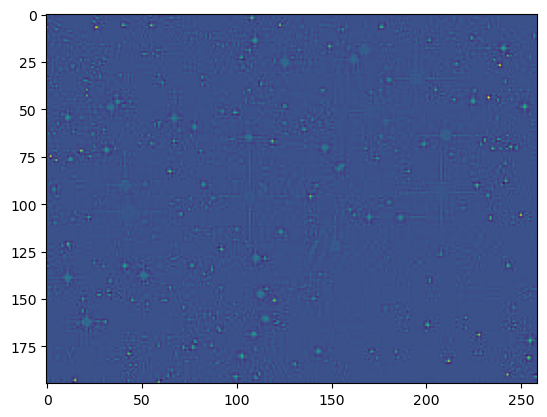

In [55]:
convolved = convolve2d(img2, kernels["Edge Detection"], 
                       mode='same', boundary='symm')
plt.imshow(convolved)

In [51]:
def apply_and_display_convolution(image, kernel_name):
    kernel = kernels[kernel_name]
    
    # Apply convolution
    convolved = convolve2d(image, kernel, mode='same', boundary='symm')
    
    # Display results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    ax1.imshow(image, cmap='gray')
    ax1.set_title('Original Image')
    ax1.axis('off')
    
    ax2.imshow(convolved, cmap='gray')
    ax2.set_title(f'After {kernel_name} Convolution')
    ax2.axis('off')
    
    plt.show()
    
    # Display the kernel
    print(f"{kernel_name} Kernel:")
    print(kernel)

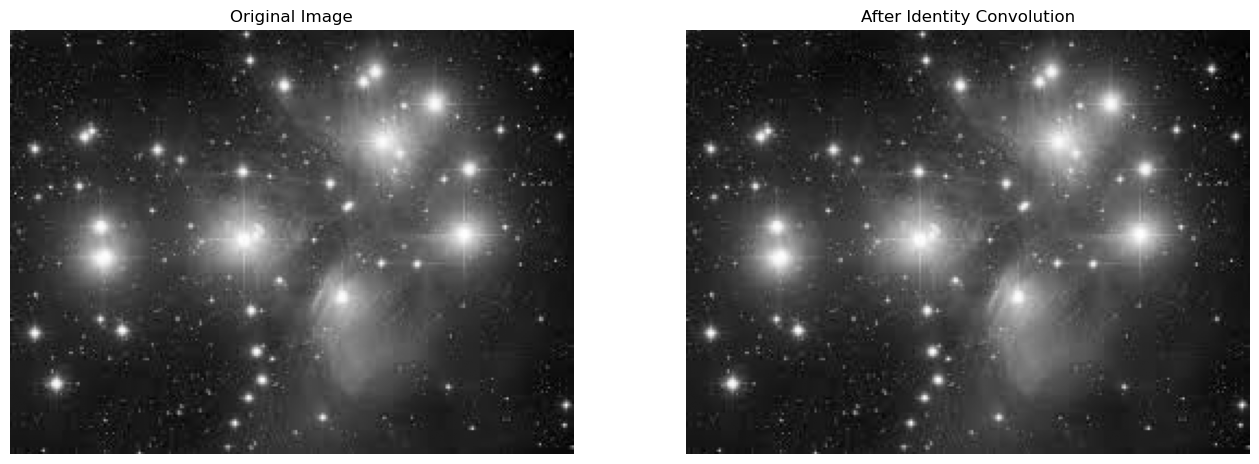

Identity Kernel:
[[0 0 0]
 [0 1 0]
 [0 0 0]]


In [52]:
apply_and_display_convolution(img2, "Identity")

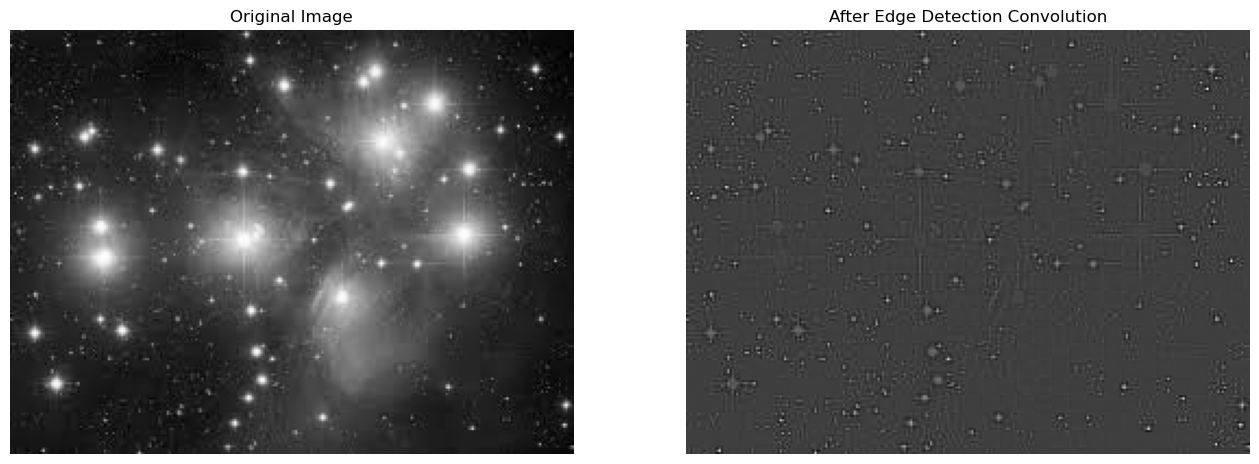

Edge Detection Kernel:
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


In [54]:
f=apply_and_display_convolution(img2, "Edge Detection")

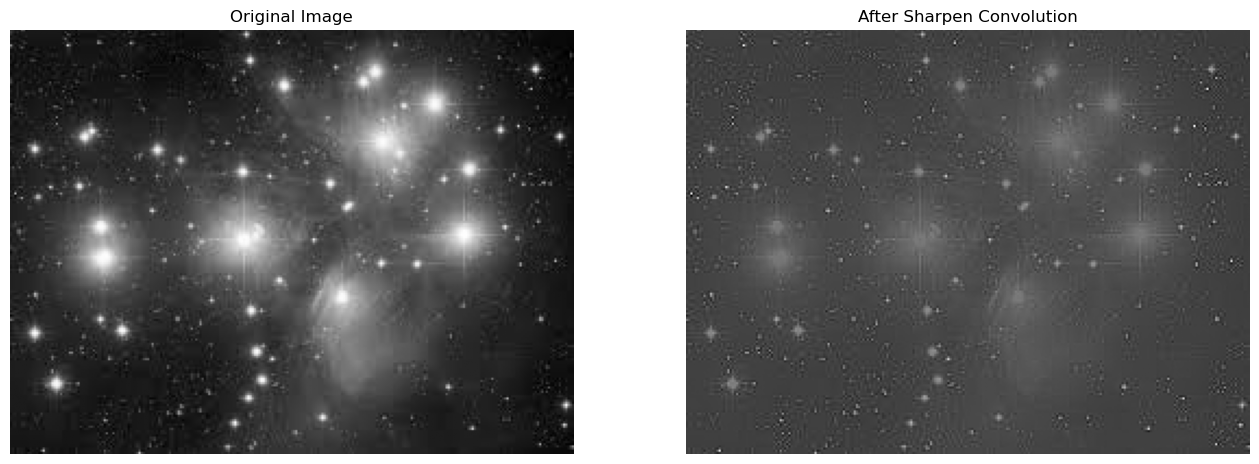

Sharpen Kernel:
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


In [68]:
apply_and_display_convolution(img2, "Sharpen")

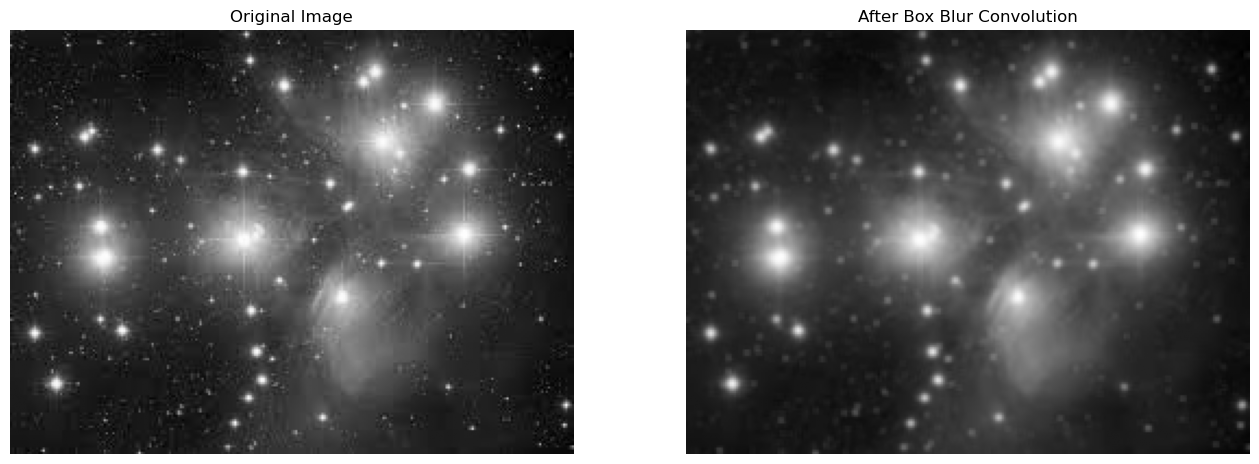

Box Blur Kernel:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [69]:
apply_and_display_convolution(img2, "Box Blur")

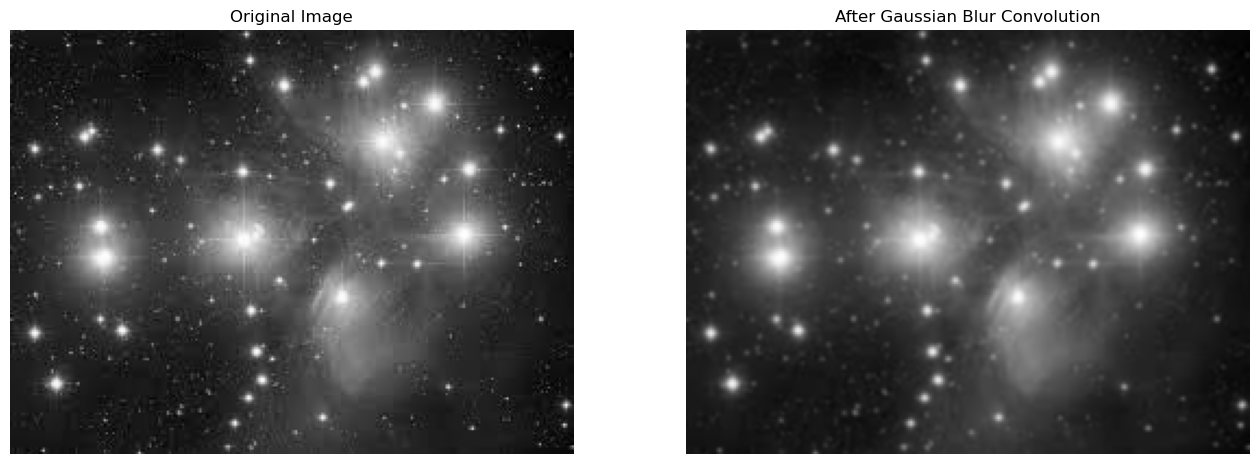

Gaussian Blur Kernel:
[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


In [70]:
apply_and_display_convolution(img2, "Gaussian Blur")

## Animations

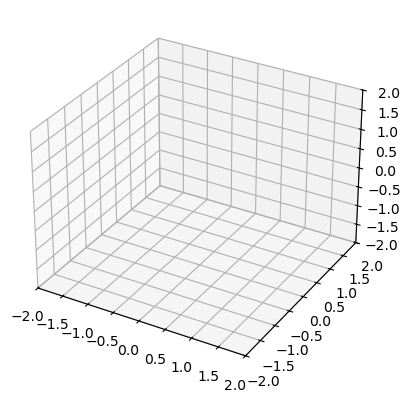

In [71]:
# Probably does not work natively on Jupyter
import matplotlib.animation as animation 
def anima(num, data, line):
    line.set_data(data[:2, :num])
    line.set_3d_properties(data[2, :num])
    return line,
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
t=np.linspace(-2*np.pi,2*np.pi,100)
x=1+np.cos(t)
y=np.sin(t)
z=2*np.sin(t/2)
data=np.vstack((x,y,z)) 

ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(-2, 2)

lines, = ax.plot([],[],[], "ro")
line_ani = animation.FuncAnimation(fig, anima, 100, fargs=(data, lines),
    interval=100, blit=True)
plt.show()

In [ ]:
def just_a_point(num,data,line):
    line.set_data(data[0][num], data[1][num])
    line.set_3d_properties(data[2][num])    
    return line,

def clear(line):
    line.set_data([], [])
    line.set_3d_properties([])    
    return line,

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
t=np.linspace(-2*np.pi,2*np.pi,100)
x=1+np.cos(t)
y=np.sin(t)
z=2*np.sin(t/2)
data=np.vstack((x,y,z)) 

ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(-2, 2)

lines, = ax.plot([],[],[], "r-")
lines2, = ax.plot([],[],[], "ro")
line_ani2 = animation.FuncAnimation(fig, just_a_point, 100, fargs=(data, lines2),
                                   interval=100, blit=False)
plt.show()
line_ani = animation.FuncAnimation(fig, anima, 100, fargs=(data, lines),
    interval=100, blit=False)



## Exercise
- Try to animate the random walk that you previously did.

### Fourier Transform

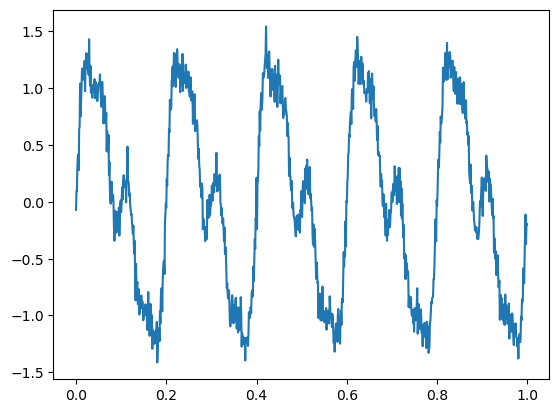

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(125)

# Time vector
t = np.linspace(0, 1, 1000, endpoint=False)

# Create a signal with multiple frequency components
freq1, freq2, freq3 = 5, 10, 20
signal = (np.sin(2 * np.pi * freq1 * t) + 
          0.5 * np.sin(2 * np.pi * freq2 * t) + 
          0.25 * np.sin(2 * np.pi * freq3 * t))

# Add some noise
noise = np.random.normal(0, 0.1, signal.shape)
noisy_signal = signal + noise

plt.plot(t, noisy_signal)

In [73]:
help(np.fft.fftfreq)

Help on function fftfreq in module numpy.fft:

fftfreq(n, d=1.0, device=None)
    Return the Discrete Fourier Transform sample frequencies.

    The returned float array `f` contains the frequency bin centers in cycles
    per unit of the sample spacing (with zero at the start).  For instance, if
    the sample spacing is in seconds, then the frequency unit is cycles/second.

    Given a window length `n` and a sample spacing `d`::

      f = [0, 1, ...,   n/2-1,     -n/2, ..., -1] / (d*n)   if n is even
      f = [0, 1, ..., (n-1)/2, -(n-1)/2, ..., -1] / (d*n)   if n is odd

    Parameters
    ----------
    n : int
        Window length.
    d : scalar, optional
        Sample spacing (inverse of the sampling rate). Defaults to 1.
    device : str, optional
        The device on which to place the created array. Default: ``None``.
        For Array-API interoperability only, so must be ``"cpu"`` if passed.

        .. versionadded:: 2.0.0

    Returns
    -------
    f : ndarray
    

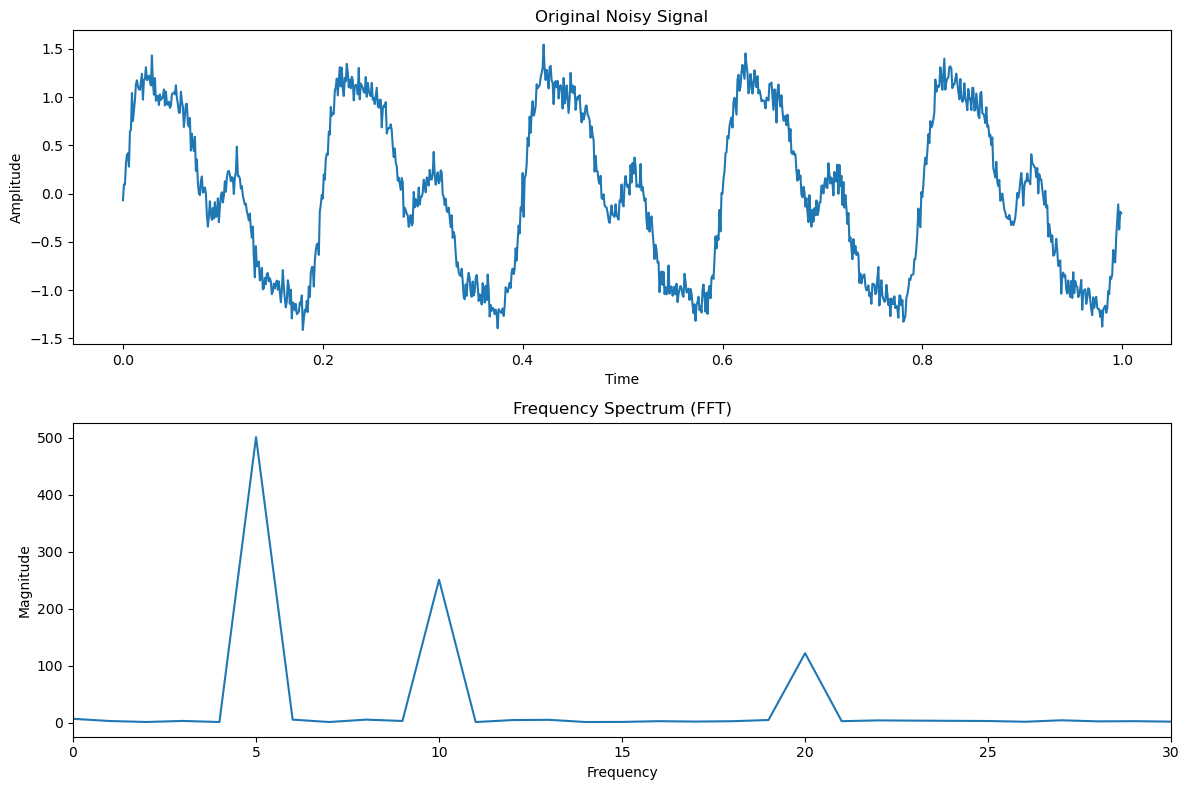

In [74]:
# Compute the Fast Fourier Transform (FFT)
fft_result = np.fft.fft(noisy_signal)
fft_freq = np.fft.fftfreq(len(t), t[1] - t[0])

# Plot the original signal and its FFT
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(t, noisy_signal)
plt.title('Original Noisy Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(fft_freq[:len(fft_freq)//2], np.abs(fft_result)[:len(fft_freq)//2])
plt.title('Frequency Spectrum (FFT)')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.xlim(0, 30)

plt.tight_layout()
plt.show()